In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from nilearn import image
from scipy.spatial.distance import euclidean, correlation, squareform
from tqdm import tqdm
from os.path import join as opj
import sys
sys.path.append("../../")
from src.utils import t_to_r

/home/javi/Documentos/software/nilearn/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
final_subjects = np.loadtxt("../../data/subjects_intersect_motion_035.txt")
n_subjects = len(final_subjects)

In [3]:
def load_edge_first_level_maps(task_id, subjects, contrasts = None):
    if contrasts is None:
        contrasts = ["constant", 
                     "Congruent", 
                     "Incongruent", 
                     "Incongruent-Congruent"]
    based_dir = opj("../../results/first-level/edge_gsr/shen/task-%s" % task_id)
    
    first_level_copes = dict()
    for contrast in contrasts:
        pattern = opj(based_dir, "sub-%d", contrast, "effect_size.nii.gz")

        effect_sizes = [squareform(np.squeeze(image.load_img(pattern % subj).get_fdata()), 
                                   checks=False) for subj in subjects]
        
        first_level_copes[contrast] = np.array(effect_sizes)
        
    return first_level_copes

In [4]:
def load_edge_first_level_corrs(task_id, subjects, contrasts = None):
    if contrasts is None:
        contrasts = ["constant", 
                     "Congruent", 
                     "Incongruent", 
                     "Incongruent-Congruent"]
    based_dir = opj("../../results/first-level/edge_gsr/shen/task-%s" % task_id)
    
    if task_id == "rest":
        df = 150-1
    else:
        df = 280-1
    
    first_level_corrs = dict()
    for contrast in contrasts:
        pattern = opj(based_dir, "sub-%d", contrast, "stat.nii.gz")

        stats = [squareform(np.squeeze(image.load_img(pattern % subj).get_fdata()), 
                                   checks=False) for subj in subjects]
        corrs = [np.apply_along_axis(func1d=t_to_r, axis=0, arr=st, df=df) for st in stats]
        first_level_corrs[contrast] = np.array(corrs)
        
    return first_level_corrs

In [5]:
def compute_distances(rest_metric, task_metric):
    distances_dict = dict()
    for reg in ['constant', "Congruent", "Incongruent"]:
        
        d = []
        for (a,b) in zip(rest_metric['constant'], task_metric[reg]):
            d.append(correlation(a, b))
        distances_dict[reg] = d
        
    return distances_dict

In [10]:
effect_sizes_stroop = load_edge_first_level_maps(task_id = "stroop", subjects = final_subjects)
effect_sizes_msit = load_edge_first_level_maps(task_id = "msit", subjects = final_subjects)
effect_sizes_rest = load_edge_first_level_maps(task_id = "rest", subjects = final_subjects, contrasts = ['constant'])

In [7]:
cors_stroop = load_edge_first_level_corrs(task_id = "stroop", subjects = final_subjects)
cors_msit = load_edge_first_level_corrs(task_id = "msit", subjects = final_subjects)
cors_rest = load_edge_first_level_corrs(task_id = "rest", subjects = final_subjects, contrasts = ['constant'])

In [12]:
distances_stroop = compute_distances(rest_metric = effect_sizes_rest, 
                                     task_metric = effect_sizes_stroop)
distances_msit = compute_distances(rest_metric = effect_sizes_rest, 
                                     task_metric = effect_sizes_msit)

# distances_stroop = compute_distances(rest_metric = cors_rest, 
#                                      task_metric = cors_stroop)
# distances_msit = compute_distances(rest_metric = cors_rest, 
#                                      task_metric = cors_msit)

In [9]:
print(np.mean(distances_stroop['constant']))
print(np.std(distances_stroop['constant']))
print(np.mean(distances_msit['constant']))
print(np.std(distances_msit['constant']))

print("Congruent")
print(np.round(np.mean(distances_stroop['Congruent']), 2))
print(np.round(np.std(distances_stroop['Congruent']), 2))
print(np.round(np.mean(distances_msit['Congruent']), 2))
print(np.round(np.std(distances_msit['Congruent']), 2))

print("Incongruent")

print(np.round(np.mean(distances_stroop['Incongruent']), 2))
print(np.round(np.std(distances_stroop['Incongruent']), 2))
print(np.round(np.mean(distances_msit['Incongruent']), 2))
print(np.round(np.std(distances_msit['Incongruent']), 2))

0.7964712715116371
0.06258885889616506
0.7909658392010777
0.05794981699811575
Congruent
1.02
0.07
1.0
0.07
Incongruent
1.02
0.07
1.03
0.07


In [13]:
print(np.mean(distances_stroop['constant']))
print(np.std(distances_stroop['constant']))
print(np.mean(distances_msit['constant']))
print(np.std(distances_msit['constant']))

print("Congruent")
print(np.round(np.mean(distances_stroop['Congruent']), 2))
print(np.round(np.std(distances_stroop['Congruent']), 2))
print(np.round(np.mean(distances_msit['Congruent']), 2))
print(np.round(np.std(distances_msit['Congruent']), 2))

print("Incongruent")

print(np.round(np.mean(distances_stroop['Incongruent']), 2))
print(np.round(np.std(distances_stroop['Incongruent']), 2))
print(np.round(np.mean(distances_msit['Incongruent']), 2))
print(np.round(np.std(distances_msit['Incongruent']), 2))

0.7823005100889691
0.06570442619192032
0.7771107608807045
0.06041461951360451
Congruent
1.02
0.08
1.01
0.07
Incongruent
1.02
0.07
1.03
0.07


In [30]:
distances_al

(1694, 1694)

In [14]:
from scipy.stats import ttest_rel
ttest_rel(distances_msit['constant'], distances_msit['Congruent'])

Ttest_relResult(statistic=-30.30467761397877, pvalue=3.587183287321865e-84)

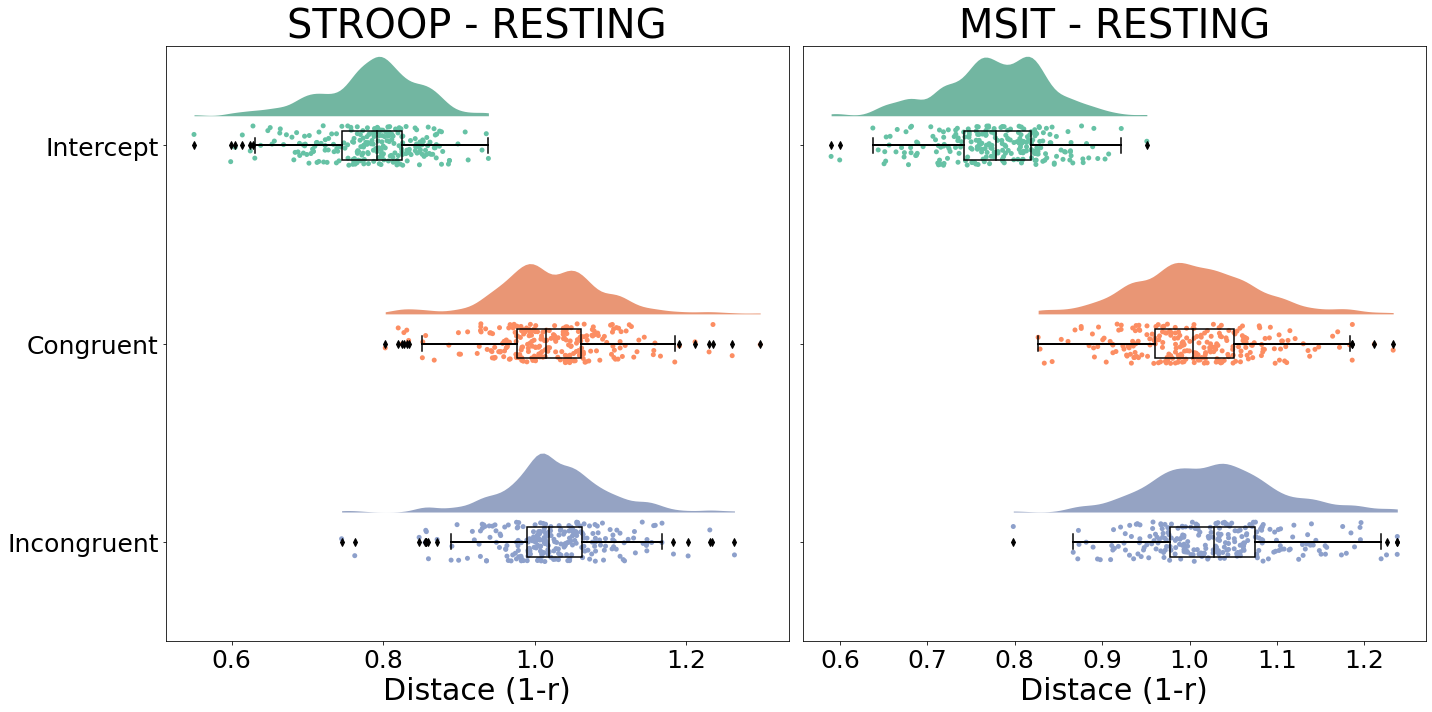

In [15]:
import ptitprince as pt
import seaborn as sns

distances_stroop_df = pd.DataFrame({'Intercept' : distances_stroop['constant'],
                       'Congruent' : distances_stroop['Congruent'],
                       'Incongruent' : distances_stroop['Incongruent']
                      })
distances_msit_df = pd.DataFrame({'Intercept' : distances_msit['constant'],
                       'Congruent' : distances_msit['Congruent'],
                       'Incongruent' : distances_msit['Incongruent']
                      })

pal = "Set2"
fig, axs = plt.subplots(ncols = 2, figsize = (20, 10), sharey=True)
pt.half_violinplot(y = "trial_type", x = "distance", 
                            data = pd.melt(distances_stroop_df, 
                            var_name = "trial_type",
                            value_name ='distance'), 
                            palette = pal, bw = .2, cut = 0., linewidth = 0,
                            ax=axs[0],
                      scale = "area", width = .6, inner = None, orient = 'h')

sns.stripplot(y = "trial_type", x = "distance", 
                       data = pd.melt(distances_stroop_df, var_name = "trial_type", value_name ='distance'),
                       palette = pal, edgecolor = "white",
                       ax=axs[0],
                       size = 5, jitter = 1, zorder = 0, orient = 'h')

sns.boxplot(y = "trial_type", x = "distance", 
                     data = pd.melt(distances_stroop_df, var_name = "trial_type", value_name ='distance'), 
                     color = "black", width = .15, zorder = 10,
                     ax=axs[0],
                     showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                     showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},
                     saturation = 1, orient = 'h')

axs[0].set_ylabel("")
axs[0].set_xlabel("Distace (1-r)", size=30)
axs[0].tick_params(labelsize=25)
axs[0].set_title("STROOP - RESTING", size=40)

pt.half_violinplot(y = "trial_type", x = "distance", 
                   data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'), 
                   palette = pal, bw = .2, cut = 0., linewidth = 0,
                   ax = axs[1], scale = "area", 
                   width = .6, inner = None, orient = 'h')

sns.stripplot(y = "trial_type", x = "distance", 
                       data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'),
                       palette = pal, edgecolor = "white",
                       ax=axs[1],
                       size = 5, jitter = 1, zorder = 0, orient = 'h')

sns.boxplot(y = "trial_type", x = "distance", 
                     data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'), 
                     color = "black", width = .15, zorder = 10,
                     ax=axs[1],
                     showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                     showfliers=True, whiskerprops = {'linewidth': 2, "zorder":10},
                     saturation = 1, orient = 'h')

axs[1].set_ylabel("")
axs[1].set_xlabel("Distace (1-r)", size=30)
axs[1].tick_params(labelsize = 25)
axs[1].set_title("MSIT - RESTING", size = 40)
plt.tight_layout()
#plt.savefig("../plots/distances_networks.png", dpi=300)
#plt.savefig("../plots/distances_networks.svg", dpi=300)
#plt.savefig("../plots/distances_networks.pdf", dpi=300)

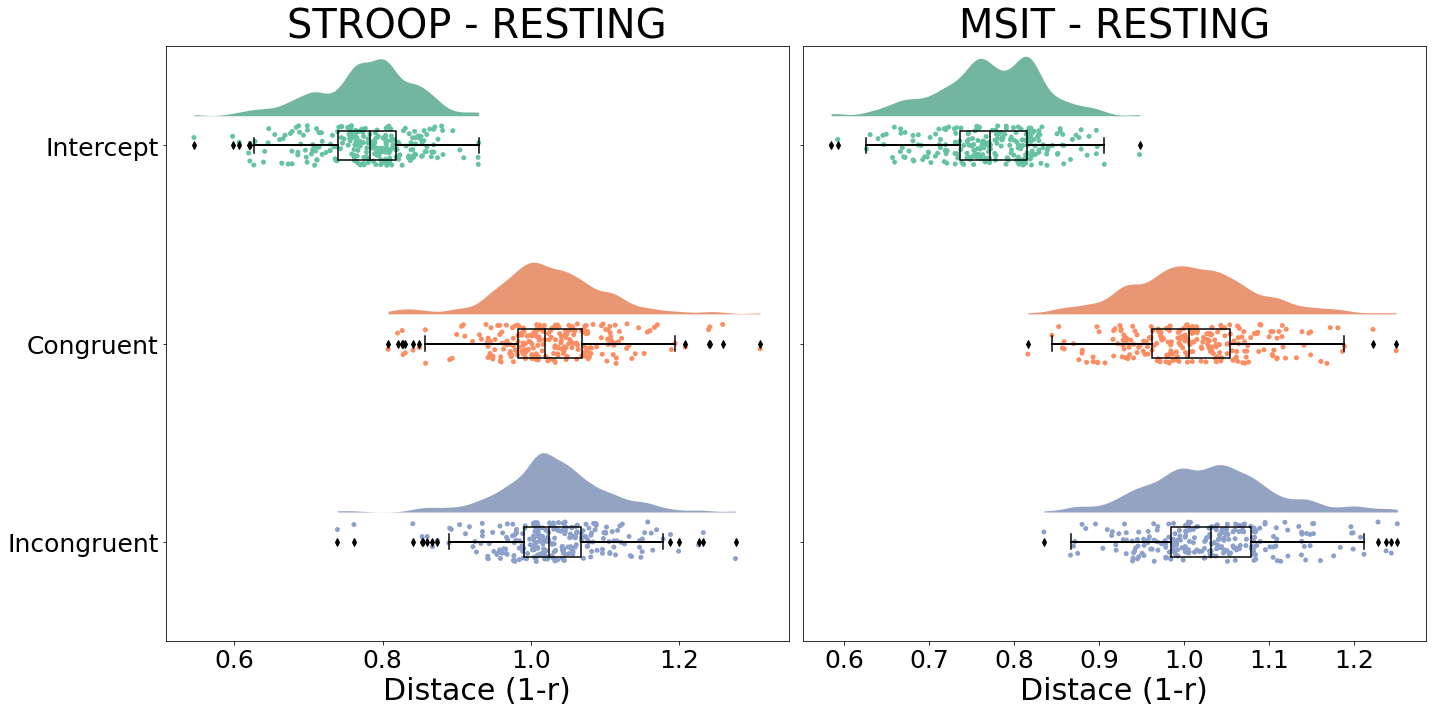

In [12]:
import ptitprince as pt
import seaborn as sns

distances_stroop_df = pd.DataFrame({'Intercept' : distances_stroop['constant'],
                       'Congruent' : distances_stroop['Congruent'],
                       'Incongruent' : distances_stroop['Incongruent']
                      })
distances_msit_df = pd.DataFrame({'Intercept' : distances_msit['constant'],
                       'Congruent' : distances_msit['Congruent'],
                       'Incongruent' : distances_msit['Incongruent']
                      })

pal = "Set2"
fig, axs = plt.subplots(ncols = 2, figsize = (20, 10), sharey=True)
pt.half_violinplot(y = "trial_type", x = "distance", 
                            data = pd.melt(distances_stroop_df, 
                            var_name = "trial_type",
                            value_name ='distance'), 
                            palette = pal, bw = .2, cut = 0., linewidth = 0,
                            ax=axs[0],
                      scale = "area", width = .6, inner = None, orient = 'h')

sns.stripplot(y = "trial_type", x = "distance", 
                       data = pd.melt(distances_stroop_df, var_name = "trial_type", value_name ='distance'),
                       palette = pal, edgecolor = "white",
                       ax=axs[0],
                       size = 5, jitter = 1, zorder = 0, orient = 'h')

sns.boxplot(y = "trial_type", x = "distance", 
                     data = pd.melt(distances_stroop_df, var_name = "trial_type", value_name ='distance'), 
                     color = "black", width = .15, zorder = 10,
                     ax=axs[0],
                     showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                     showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},
                     saturation = 1, orient = 'h')

axs[0].set_ylabel("")
axs[0].set_xlabel("Distace (1-r)", size=30)
axs[0].tick_params(labelsize=25)
axs[0].set_title("STROOP - RESTING", size=40)

pt.half_violinplot(y = "trial_type", x = "distance", 
                   data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'), 
                   palette = pal, bw = .2, cut = 0., linewidth = 0,
                   ax = axs[1], scale = "area", 
                   width = .6, inner = None, orient = 'h')

sns.stripplot(y = "trial_type", x = "distance", 
                       data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'),
                       palette = pal, edgecolor = "white",
                       ax=axs[1],
                       size = 5, jitter = 1, zorder = 0, orient = 'h')

sns.boxplot(y = "trial_type", x = "distance", 
                     data = pd.melt(distances_msit_df, var_name = "trial_type", value_name ='distance'), 
                     color = "black", width = .15, zorder = 10,
                     ax=axs[1],
                     showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                     showfliers=True, whiskerprops = {'linewidth': 2, "zorder":10},
                     saturation = 1, orient = 'h')

axs[1].set_ylabel("")
axs[1].set_xlabel("Distace (1-r)", size=30)
axs[1].tick_params(labelsize = 25)
axs[1].set_title("MSIT - RESTING", size = 40)
plt.tight_layout()
#plt.savefig("../plots/distances_networks.png", dpi=300)
#plt.savefig("../plots/distances_networks.svg", dpi=300)
#plt.savefig("../plots/distances_networks.pdf", dpi=300)

In [42]:
distances_all = np.corrcoef(np.row_stack((cors_rest['constant'],
                              cors_stroop['constant'], 
                              cors_stroop['Congruent'],
                              cors_stroop['Incongruent'],
                              cors_msit['constant'], 
                              cors_msit['Congruent'],
                              cors_msit['Incongruent'])))
distances_all = 1 - distances_all

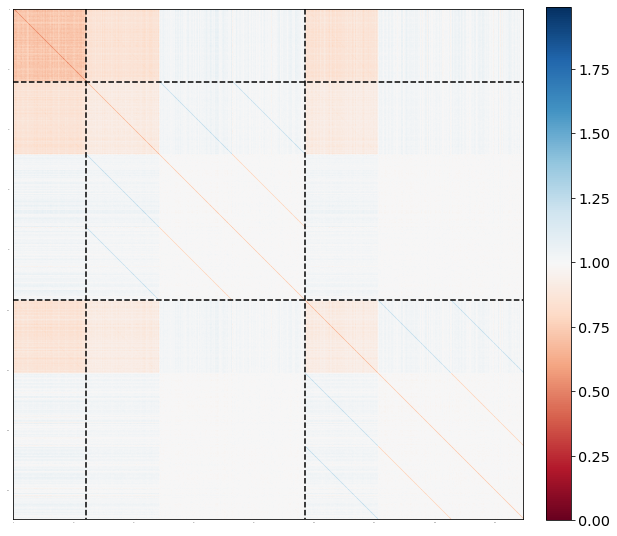

In [43]:
n_subjects = len(final_subjects)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(distances_all, cmap=plt.cm.RdBu)
xmin,xmax = ax.get_xlim()
plt.hlines(n_subjects, xmin = xmin, xmax = xmax, colors = "black", linestyles="dashed")
plt.vlines(n_subjects, ymin = xmin, ymax = xmax, colors = "black", linestyles="dashed")
plt.hlines(4*n_subjects, xmin = xmin, xmax = xmax, colors = "black", linestyles="dashed")
plt.vlines(4*n_subjects, ymin = xmin, ymax = xmax, colors = "black", linestyles="dashed")
cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize='x-large')
plt.tick_params(size=0, labelsize=0)
#plt.savefig("../plots/distances_networks_all_subjects.png", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects.svg", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects.pdf", dpi = 300)

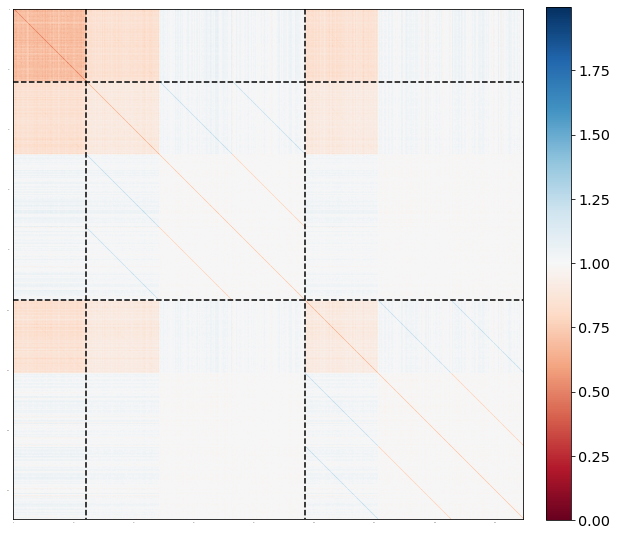

In [16]:
n_subjects = len(final_subjects)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(distances_all, cmap=plt.cm.RdBu)
xmin,xmax = ax.get_xlim()
plt.hlines(n_subjects, xmin = xmin, xmax = xmax, colors = "black", linestyles="dashed")
plt.vlines(n_subjects, ymin = xmin, ymax = xmax, colors = "black", linestyles="dashed")
plt.hlines(4*n_subjects, xmin = xmin, xmax = xmax, colors = "black", linestyles="dashed")
plt.vlines(4*n_subjects, ymin = xmin, ymax = xmax, colors = "black", linestyles="dashed")
cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize='x-large')
plt.tick_params(size=0, labelsize=0)
#plt.savefig("../plots/distances_networks_all_subjects.png", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects.svg", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects.pdf", dpi = 300)

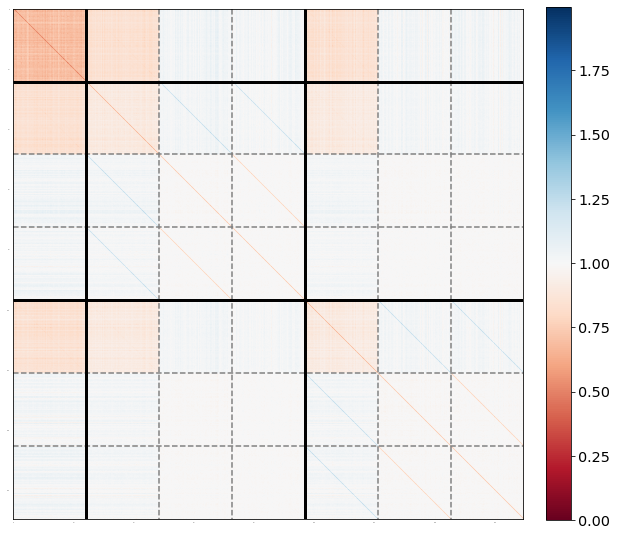

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(distances_all, cmap=plt.cm.RdBu)
xmin,xmax = ax.get_xlim()
for ii in range(1, 7):
    plt.hlines(ii*n_subjects, xmin = xmin, xmax = xmax, colors = "grey", linestyles="dashed", linewidth=1.5)
    plt.vlines(ii*n_subjects, ymin = xmin, ymax = xmax, colors = "grey", linestyles="dashed", linewidth=1.5)
    
plt.hlines(n_subjects, xmin = xmin, xmax = xmax, colors = "black", linewidth = 3)
plt.hlines(4*n_subjects, xmin = xmin, xmax = xmax, colors = "black", linewidth = 3)
plt.vlines(n_subjects, ymin = xmin, ymax = xmax, colors = "black", linewidth = 3)
plt.vlines(4*n_subjects, ymin = xmin, ymax = xmax, colors = "black", linewidth = 3)

cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize='x-large')
plt.tick_params(size=0, labelsize=0)
#plt.savefig("../plots/distances_networks_all_subjects_v2.png", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects_v2.svg", dpi = 300)
#plt.savefig("../plots/distances_networks_all_subjects_v2.pdf", dpi = 300)